# Import Dependensi dan Variabel

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
from variabel import variabel as var

# Import Data

In [18]:
df_gravimetri = pd.read_csv('hasil/ET Aktual Gravimetri.csv')
df_bc = pd.read_csv('hasil/Estimasi ET Blaney-Criddle.csv')
df_hs = pd.read_csv('hasil/Estimasi ET Hargreaves-Samani.csv')
df_pm = pd.read_csv('hasil/Estimasi ET Penman-Monteith.csv')

# Plot Gravimetri

In [19]:
df_gravimetri.head()

,Day,A1,A2,A3,A4,B1,B2,B3,B4,C1,...,D3,D4,E1,E2,E3,E4,F1,F2,F3,F4
0,day 1,2.56,3.072,2.656,6.592,0.0,0.0,0.0,0.0,3.248980,...,7.5250,7.95,7.575309,8.148148,13.066667,7.664198,23.984,13.456,15.848,9.880
1,day 2,45.92,21.120,6.464,44.000,0.0,0.0,0.0,0.0,18.269388,...,6.0125,1.80,4.414815,5.392593,9.580247,12.898765,32.240,4.824,0.456,73.768
2,day 3,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000
3,day 4,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000


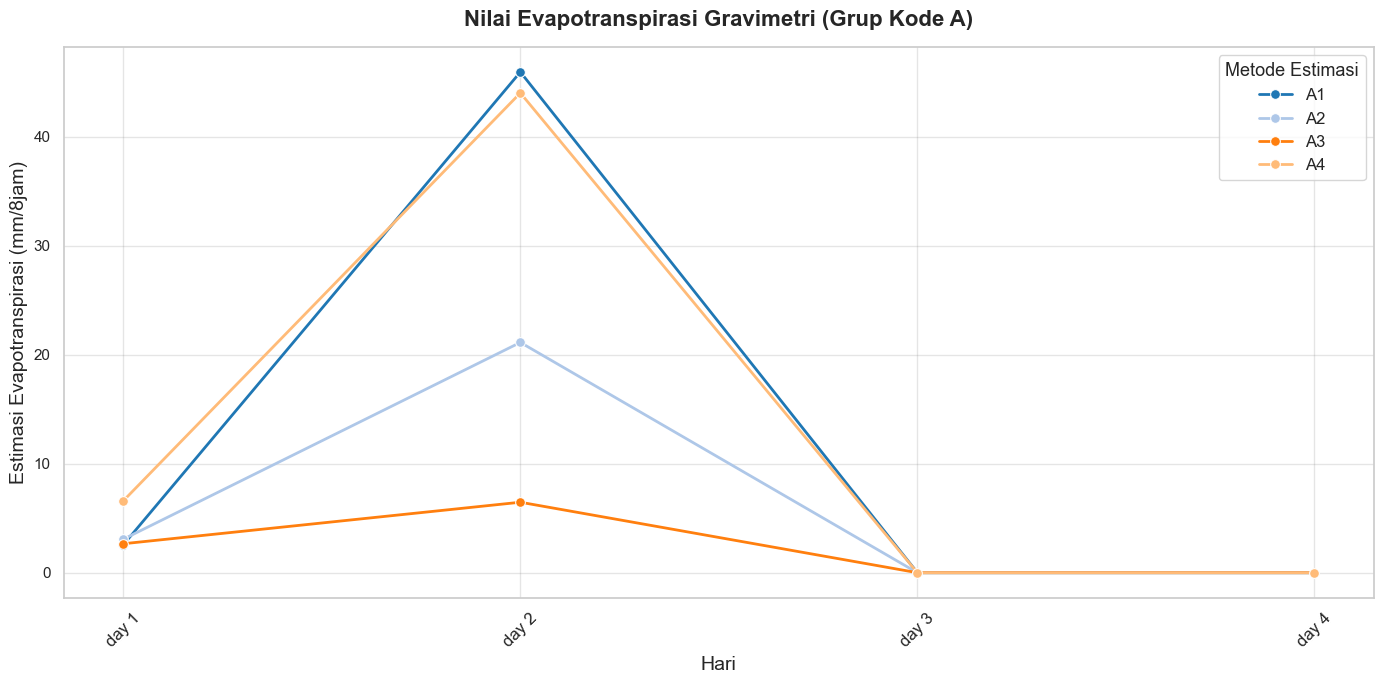

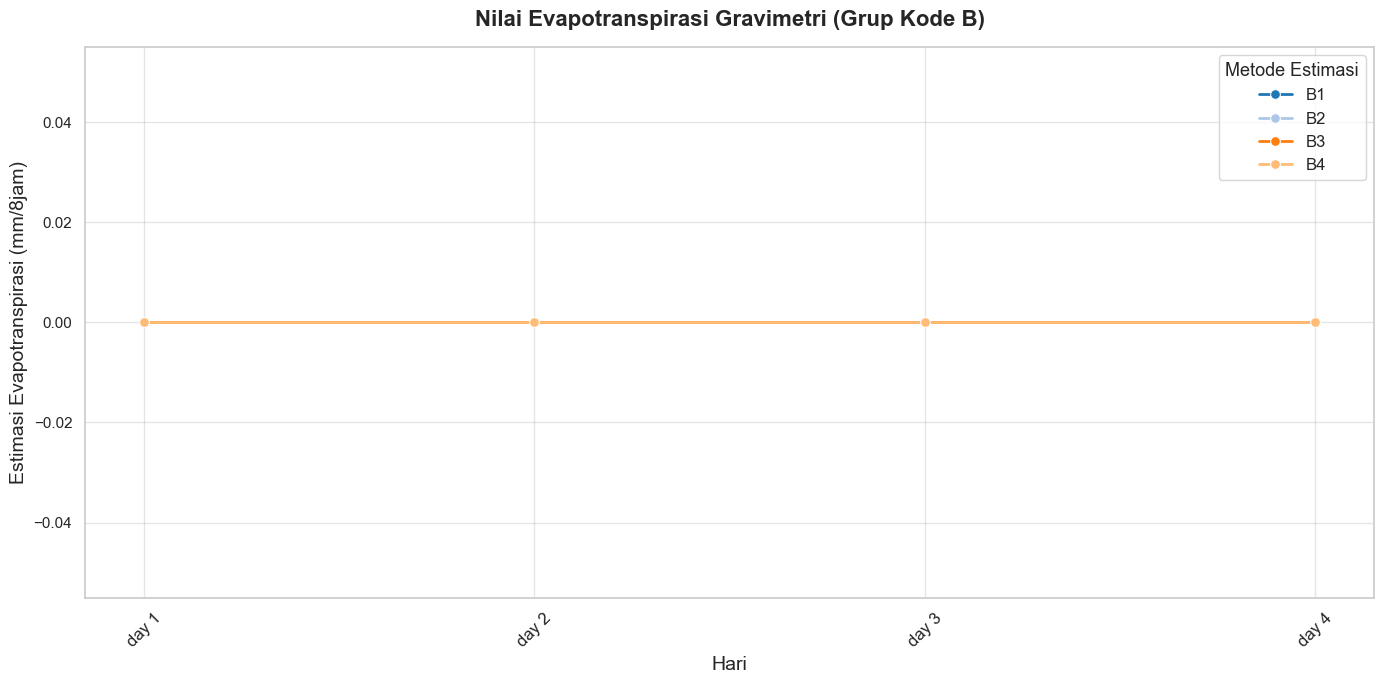

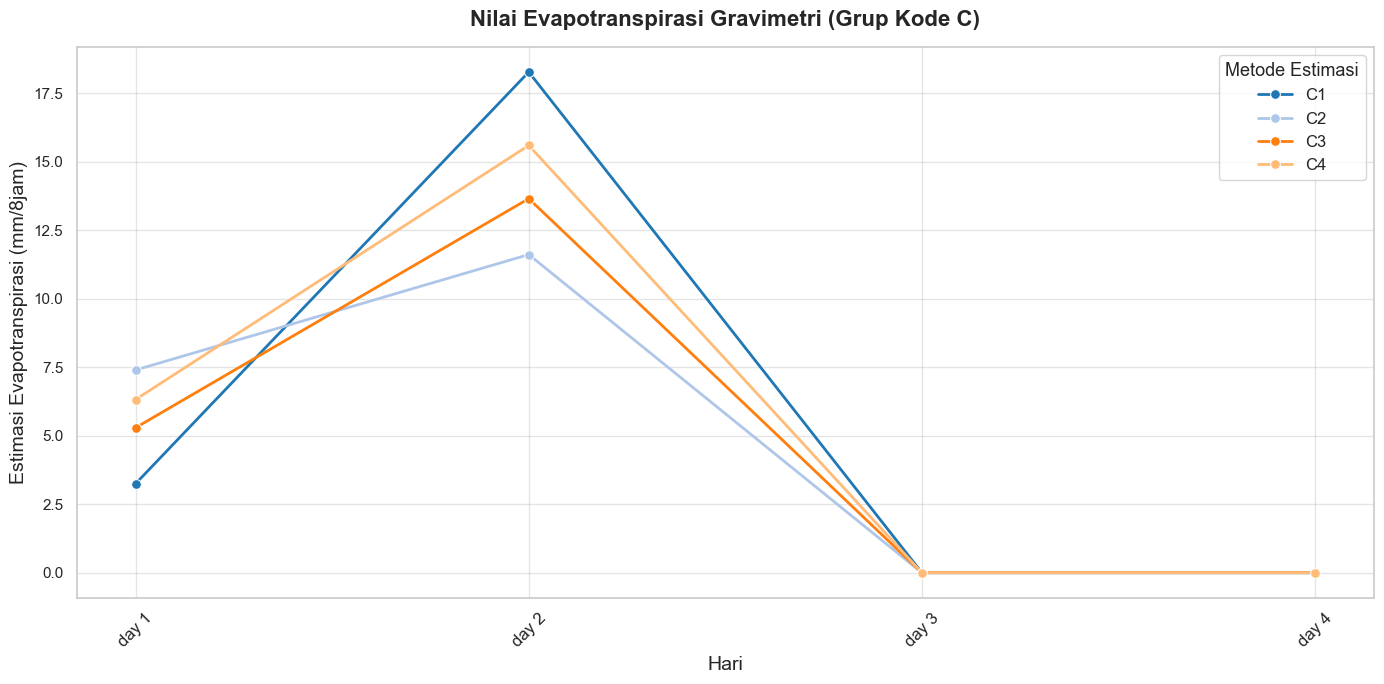

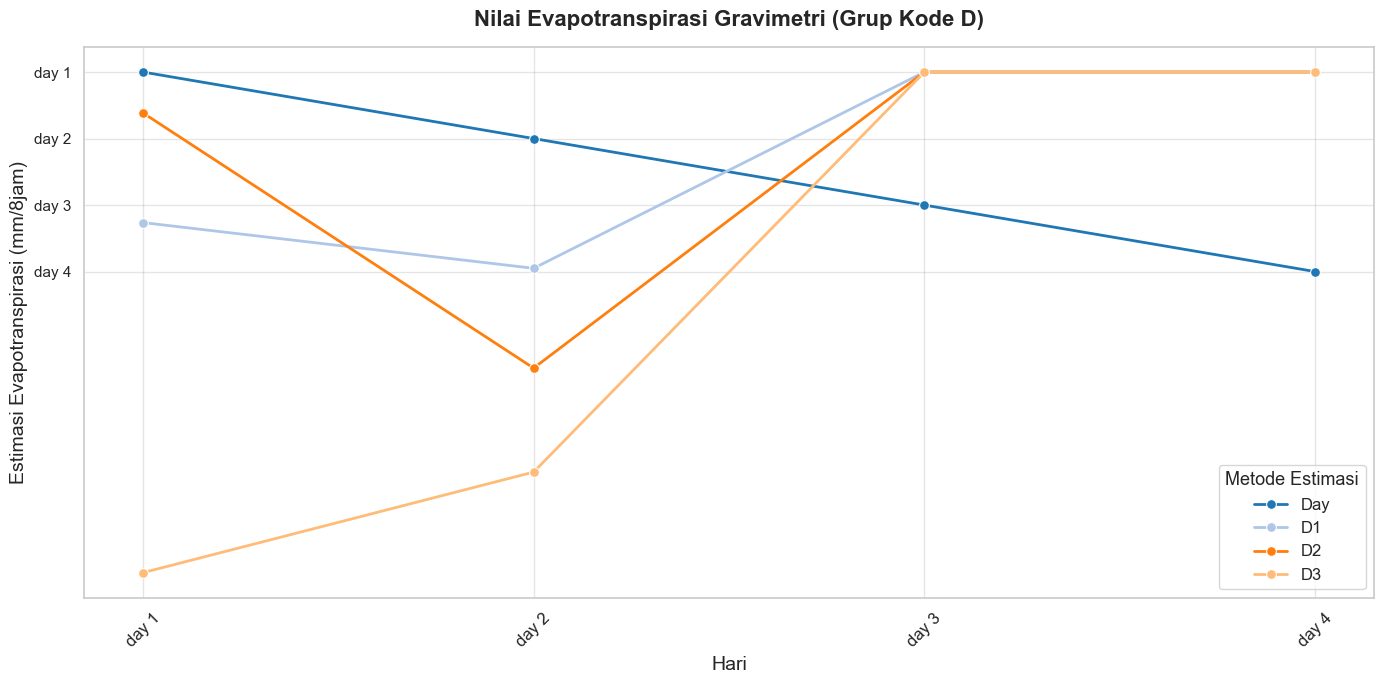

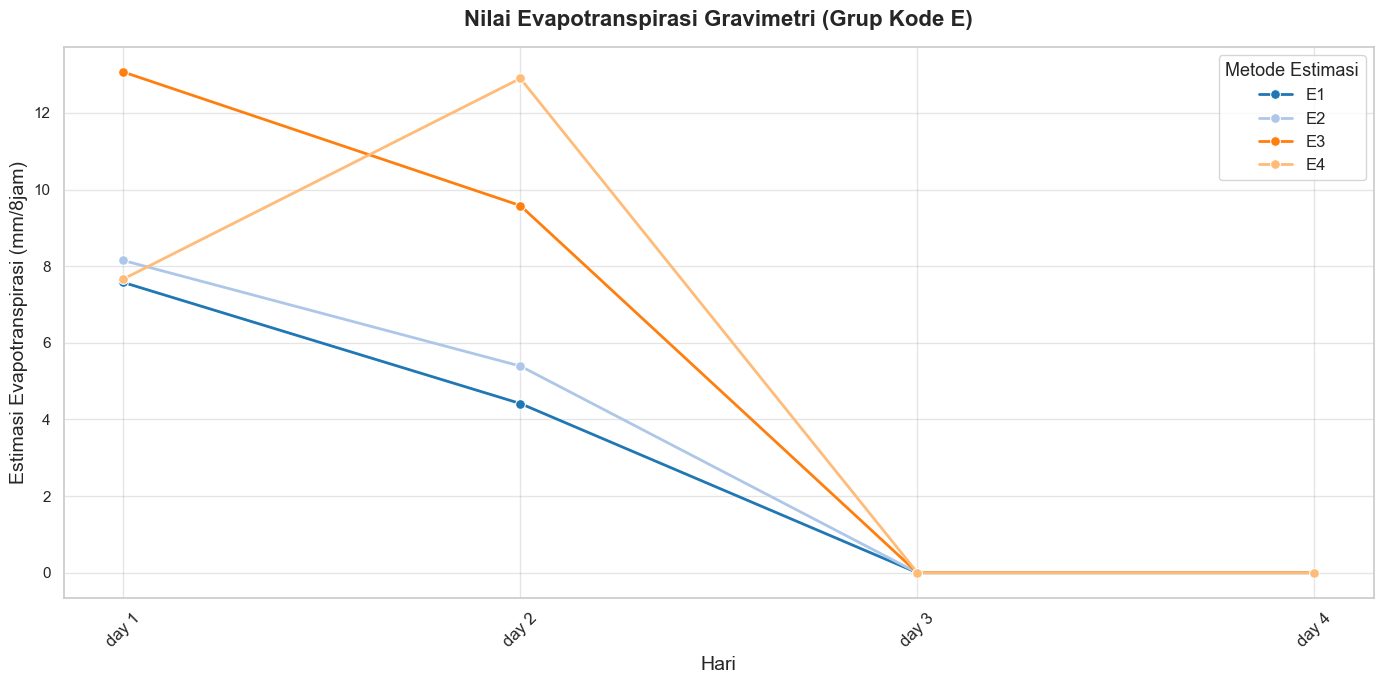

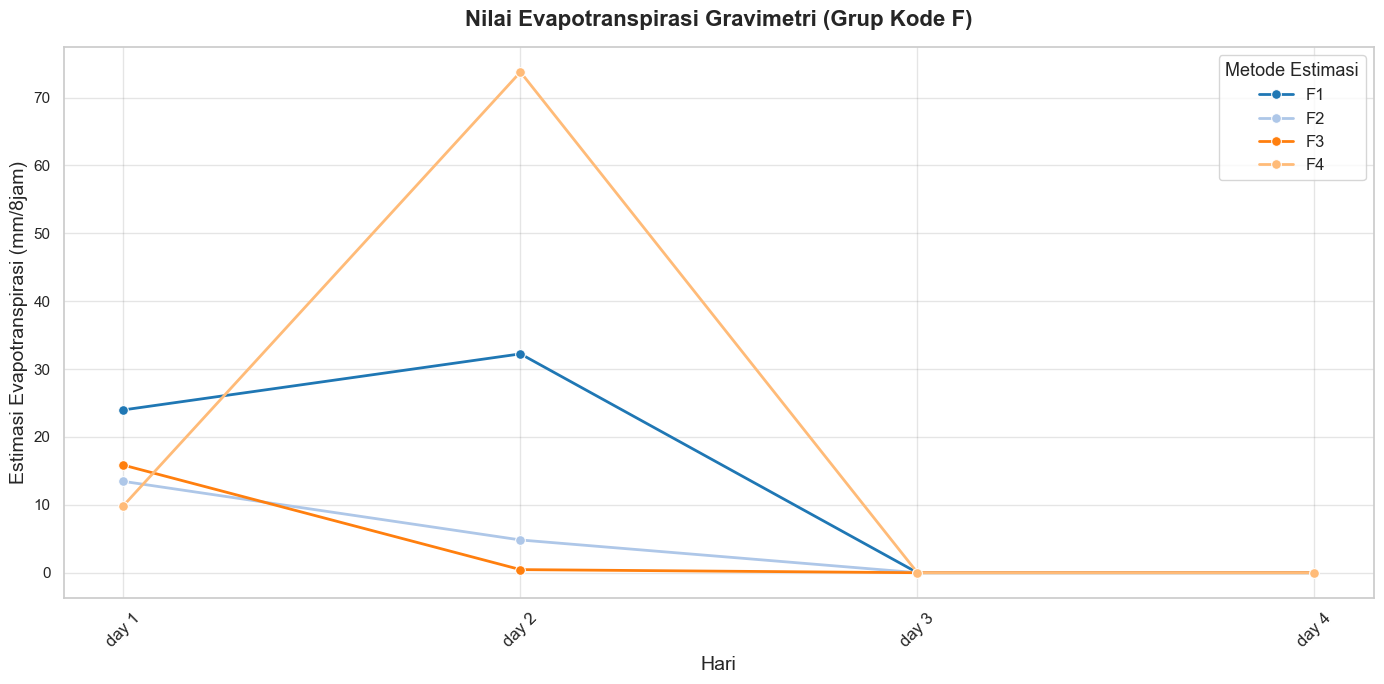

In [20]:
for group in var.kode_groups:
    # Filter kolom yang dimulai dengan grup kode yang sesuai
    df_group = df_gravimetri.filter(regex=f"^{group}").copy()
    df_group['Day'] = df_gravimetri['Day']
    
    # Atur palet warna berdasarkan jumlah kolom dalam grup
    palette = sns.color_palette("tab20", n_colors=len(df_group.columns) - 1)
    
    plt.figure(figsize=(14, 7))
    for i, column in enumerate(df_group.columns[:-1]):
        sns.lineplot(
            x=df_group['Day'], 
            y=df_group[column], 
            marker='o', 
            label=column, 
            color=palette[i], 
            markersize=7, 
            linewidth=2
        )
    
    plt.title(f'Nilai Evapotranspirasi Gravimetri (Grup Kode {group})', fontsize=16, weight='bold', pad=15)
    plt.xlabel('Hari', fontsize=14)
    plt.ylabel('Estimasi Evapotranspirasi (mm/8jam)', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(True, linestyle='-', color='gray', alpha=0.2)
    
    plt.legend(
        title='Metode Estimasi', 
        fontsize=12, 
        title_fontsize='13', 
        frameon=True, 
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
df_gravimetri.head()

,Day,A1,A2,A3,A4,B1,B2,B3,B4,C1,...,D3,D4,E1,E2,E3,E4,F1,F2,F3,F4
0,day 1,2.56,3.072,2.656,6.592,0.0,0.0,0.0,0.0,3.248980,...,7.5250,7.95,7.575309,8.148148,13.066667,7.664198,23.984,13.456,15.848,9.880
1,day 2,45.92,21.120,6.464,44.000,0.0,0.0,0.0,0.0,18.269388,...,6.0125,1.80,4.414815,5.392593,9.580247,12.898765,32.240,4.824,0.456,73.768
2,day 3,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000
3,day 4,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.000000,...,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000,0.000


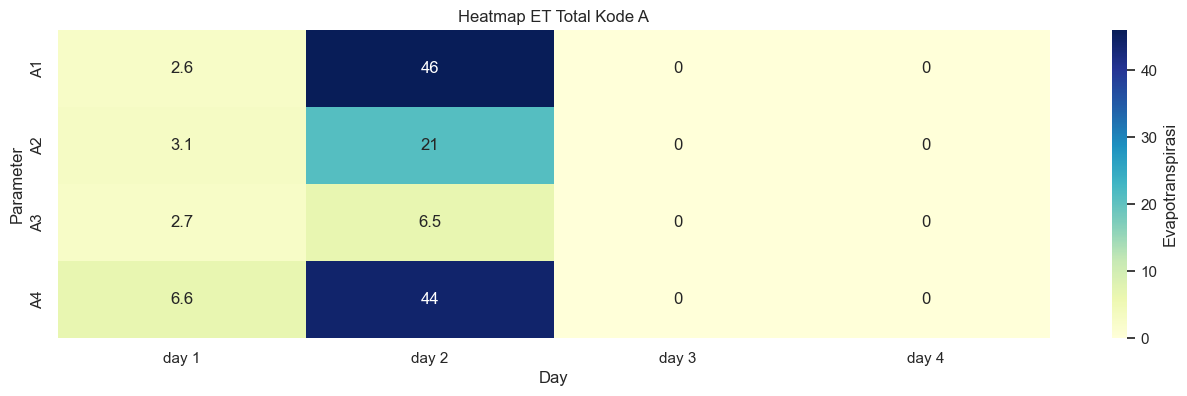

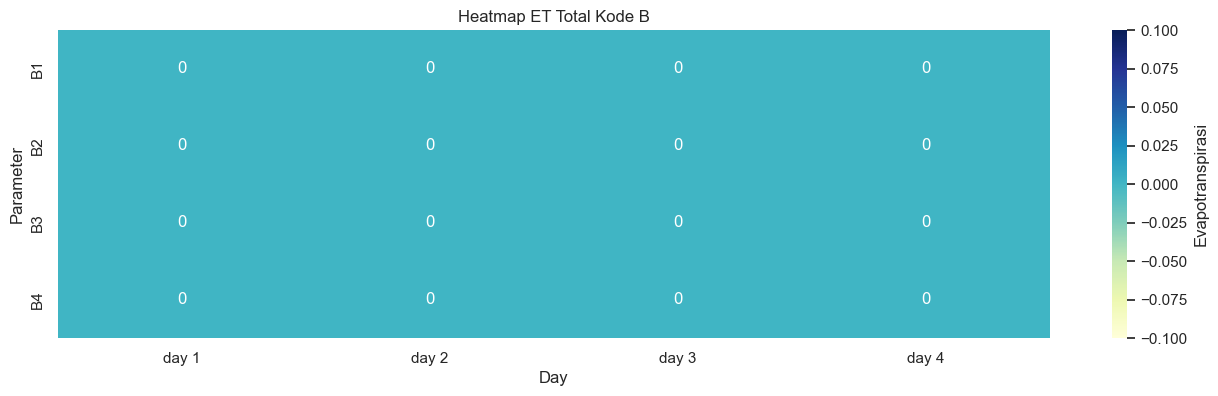

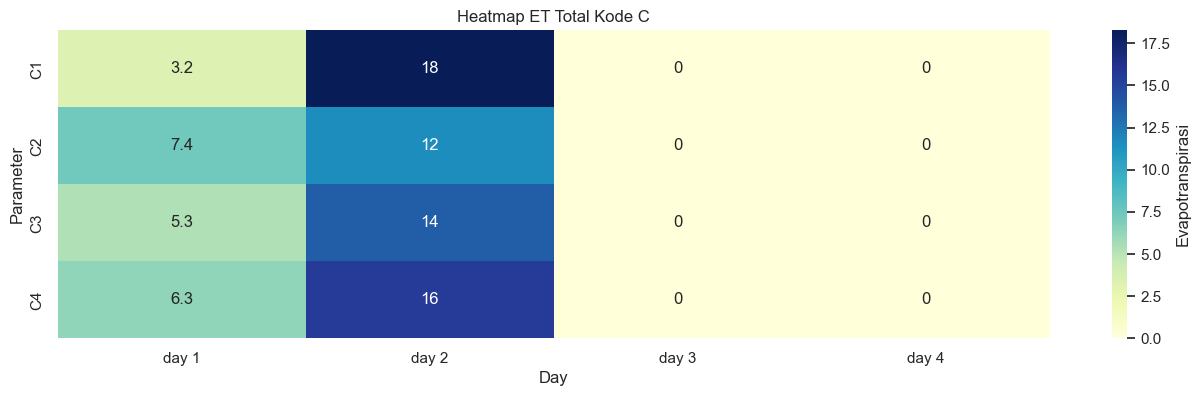

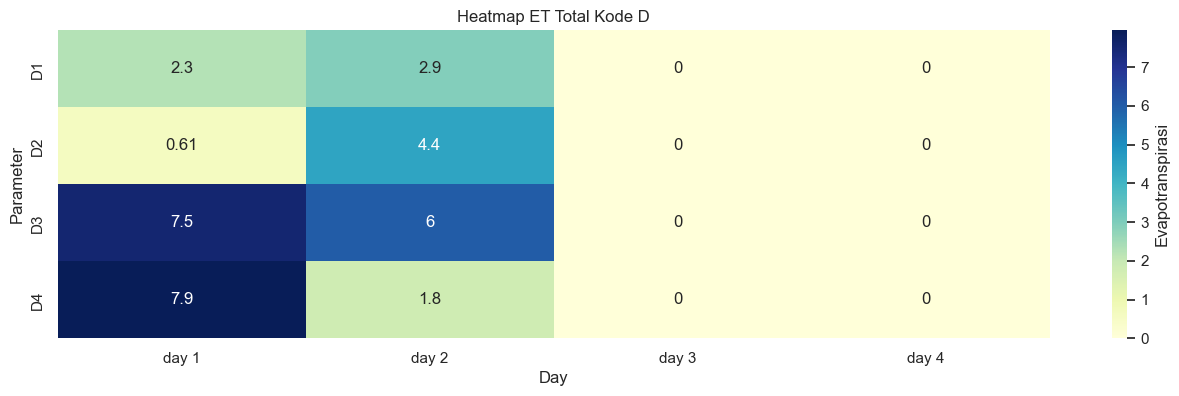

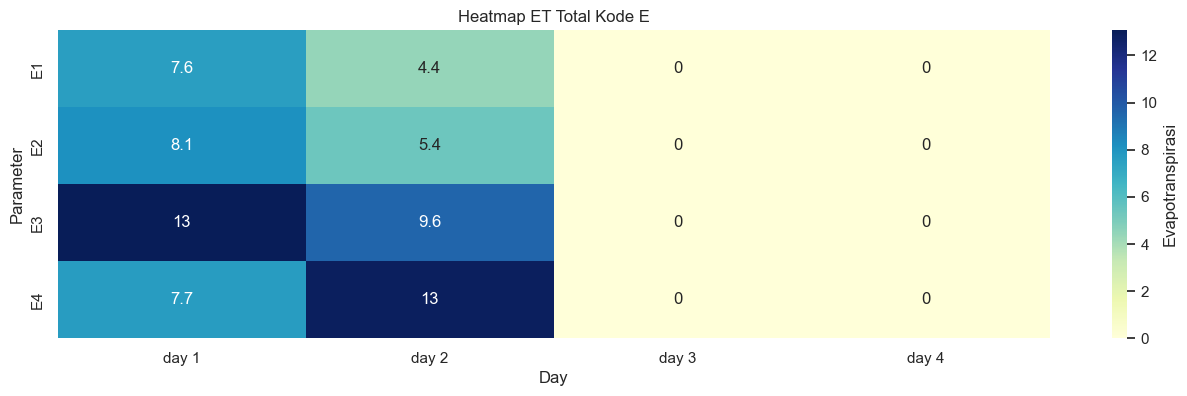

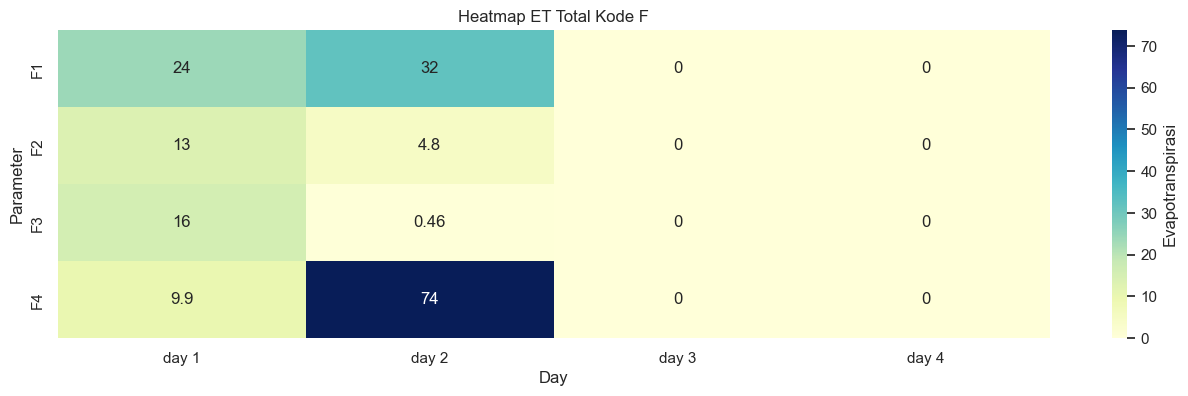

In [22]:
for group in var.kode_groups:
    # Filter kolom yang dimulai dengan grup kode yang sesuai
    df_group = df_gravimetri.filter(regex=f"^{group}").copy()
    
    # Tambahkan informasi hari ke DataFrame yang difilter
    df_group = df_group.assign(Day=df_gravimetri['Day'])
    
    # Transpose DataFrame agar kode berada di sumbu y dan hari di sumbu x
    df_transposed = df_group.set_index('Day').T

    # Plot heatmap untuk grup kode ini
    plt.figure(figsize=(16, 4))
    sns.heatmap(df_transposed, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Evapotranspirasi'})
    plt.title(f"Heatmap ET Total Kode {group}")
    plt.xlabel("Day")
    plt.ylabel("Parameter")
    plt.show()

# Plot Metode Estimasi

## Blaney-Criddle

In [23]:
df_bc.head(3)

,Day,Tanggal,Mean Suhu Udara,ET Total
0,day 1,2024-10-22,30.01500,5.887863
1,day 2,2024-10-23,30.94875,6.003835
2,day 3,2024-10-24,31.14000,6.027588


## Hargreaves-Samani

In [24]:
df_hs.head(3)

,Day,Tanggal,Max Suhu Udara,Min Suhu Udara,Mean Suhu Udara,Radiasi Extrateresterial,ET Total
0,day 1,2024-10-22,32.36,24.94,28.650,15.761121,4.586724
1,day 2,2024-10-23,33.47,25.65,29.560,15.769790,4.803622
2,day 3,2024-10-24,33.64,25.69,29.665,15.777863,4.856608


## Penman-Monteith

In [25]:
df_pm.head(3)

,Day,Tanggal,Max Suhu Udara,Min Suhu Udara,Mean Suhu Udara,Mean Kecepatan Angin,Mean Kelembapan Relatif,Radiasi Extrateresterial,ET Total
0,day 1,2024-10-22,32.36,24.94,28.650,3.06625,50.91375,15.761121,3.450344
1,day 2,2024-10-23,33.47,25.65,29.560,3.07750,47.54000,15.769790,3.774212
2,day 3,2024-10-24,33.64,25.69,29.665,2.41000,47.71875,15.777863,3.315916


## Plot Estimasi ET

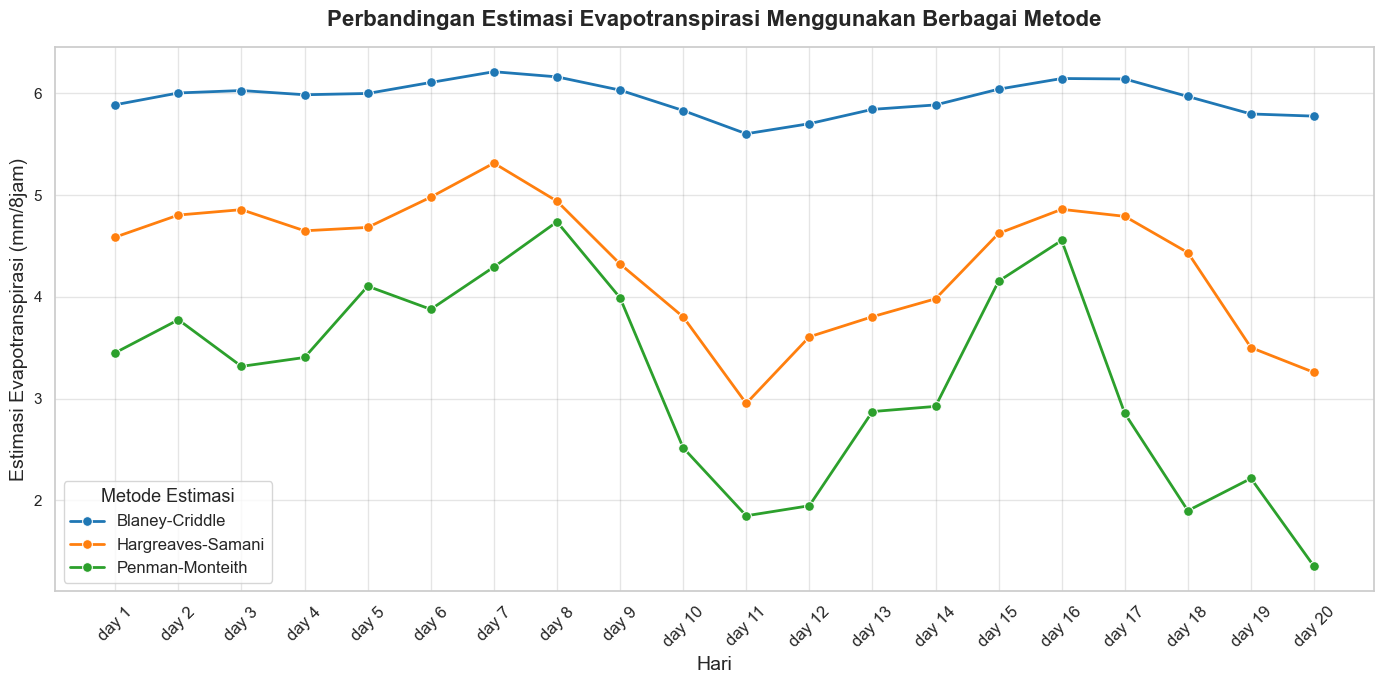

In [26]:
sns.set(style="whitegrid", palette="Set2")
plt.figure(figsize=(14, 7))

# Plot data Blaney-Criddle
sns.lineplot(
  x=df_bc['Day'], y=df_bc['ET Total'], marker='o', label='Blaney-Criddle', color='#1f77b4', markersize=7, linewidth=2)

# Plot data Hargreaves-Samani
sns.lineplot(x=df_hs['Day'], y=df_hs['ET Total'], marker='o', label='Hargreaves-Samani', color='#ff7f0e', markersize=7, linewidth=2)

# Plot data Penman-Monteith dengan
sns.lineplot(x=df_pm['Day'], y=df_pm['ET Total'], marker='o', label='Penman-Monteith', color='#2ca02c', markersize=7, linewidth=2)

plt.title('Perbandingan Estimasi Evapotranspirasi Menggunakan Berbagai Metode', fontsize=16, weight='bold', pad=15)
plt.xlabel('Hari', fontsize=14)
plt.ylabel('Estimasi Evapotranspirasi (mm/8jam)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

plt.grid(True, linestyle='-', color='gray', alpha=0.2)
plt.legend(
  title='Metode Estimasi', 
  fontsize=12, 
  title_fontsize='13', 
  frameon=True
)

plt.tight_layout()
plt.show()

# Analisis Parameter

In [ ]:
# Data aktual dan estimasi
aktual = df_gravimetri['A4']
estimasi_bc = df_bc['ET Total']
estimasi_hs = df_hs['ET Total']
estimasi_pm = df_pm['ET Total']

## Akurasi

In [ ]:
# Menghitung Akurasi


## Mean Absolute Error (MAE)

In [ ]:
# Menghitung MAE
mae_bc = mean_absolute_error(aktual, estimasi_bc)
mae_hs = mean_absolute_error(aktual, estimasi_hs)
mae_pm = mean_absolute_error(aktual, estimasi_pm)

# Menampilkan hasil
print(f'Mean Absolute Error (MAE) Blaney-Criddle: {mae_bc:.2f}')
print(f'Mean Absolute Error (MAE) Hargreaves-Samani: {mae_hs:.2f}')
print(f'Mean Absolute Error (MAE) Penman-Monteith: {mae_pm:.2f}')

# Root Mean Square Error (RMSE)

In [ ]:
# Menghitung MSE
mse_bc = mean_squared_error(aktual, estimasi_bc)
mse_hs = mean_squared_error(aktual, estimasi_hs)
mse_pm = mean_squared_error(aktual, estimasi_pm)

# Menghitung RMSE
rmse_bc = np.sqrt(mse_bc)
rmse_hs = np.sqrt(mse_hs)
rmse_pm = np.sqrt(mse_pm)

print(f'Root Mean Squared Error (RMSE) Blaney-Criddle: {rmse_bc:.2f}')
print(f'Root Mean Squared Error (RMSE) Hargreaves-Samani: {rmse_hs:.2f}')
print(f'Root Mean Squared Error (RMSE) Penman-Monteith: {rmse_pm:.2f}')

# Mean Bias Error (MBE)

In [ ]:
# Menghitung MBE
mbe_bc = np.mean(estimasi_bc - aktual)
mbe_hs = np.mean(estimasi_hs - aktual)
mbe_pm = np.mean(estimasi_pm - aktual)

print(f'Mean Bias Error (MBE) Blaney-Criddle: {mbe_bc:.2f}')
print(f'Mean Bias Error (MBE) Hargreaves-Samani: {mbe_hs:.2f}')
print(f'Mean Bias Error (MBE) Penman-Monteith: {mbe_pm:.2f}')